<a href="https://colab.research.google.com/github/Ashish265/tensorflow_in_action/blob/main/4_2_Convolution_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolution Neural Networks
Convolution neural networks (CNNs) have gained unparalleled popularity in computer vision tasks. A convolution neural network consists of several important components, such as,

* Convolution layers
* Pooling layers
* Dense layers (for final prediction)

In this chapter, we will use CNNs to learn the Cifar10 dataset. Like MNIST, Cifar10 is another popular dataset in computer vision. But it is a much more interesting dataset as you will see. Specifically, you will learn the following.

* How to do simple data exploration
* How to define a CNN model
* How to format data to suit model training
* How to train a model

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds
import tensorflow.keras.backend as K
from tensorflow.keras import layers, models
%matplotlib inline

def fix_random_seed(seed):
  """ setting the random seed of various libraries"""

  try:
    np.random.seed(seed)
  except NameError:
    print("Warning: Numpy is not imported. Setting the seed for Numpy failed.")

  try:
    tf.random.set_seed(seed)
  except NameError:
    print("Warning: TensorFlow is not imported. Setting the seed for TensorFlow failed.")

  try:
    random.seed(seed)
  except NameError:
    print("Warning: Random is not imported. Setting the seed for Random failed.")

#fixing the random seed
fix_random_seed(4321)
print("TensorFlow version: {}".format(tf.__version__))

TensorFlow version: 2.19.0


# **Loading and Exploring the data**

Here we will load the dataset using the tensorflow-datasets library. Next, we will print the very first item in the dataset and see what we have. You will see that image data varies between [0,255]. Finally, we will plot some of the images to understand the classes and images we have to work with. We will not explore this too much as we have already worked with this dataset briefly in Chapter 2.

In [2]:
data = tfds.load('cifar10')

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/cifar10/incomplete.QD0ELX_3.0.2/cifar10-train.tfrecord*...:   0%|         …

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/cifar10/incomplete.QD0ELX_3.0.2/cifar10-test.tfrecord*...:   0%|          …

Dataset cifar10 downloaded and prepared to /root/tensorflow_datasets/cifar10/3.0.2. Subsequent calls will reuse this data.


In [3]:
print(data)

{Split('train'): <_PrefetchDataset element_spec={'id': TensorSpec(shape=(), dtype=tf.string, name=None), 'image': TensorSpec(shape=(32, 32, 3), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>, Split('test'): <_PrefetchDataset element_spec={'id': TensorSpec(shape=(), dtype=tf.string, name=None), 'image': TensorSpec(shape=(32, 32, 3), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>}


In [4]:
for i in data['train'].take(1):
  print(i)

{'id': <tf.Tensor: shape=(), dtype=string, numpy=b'train_16399'>, 'image': <tf.Tensor: shape=(32, 32, 3), dtype=uint8, numpy=
array([[[143,  96,  70],
        [141,  96,  72],
        [135,  93,  72],
        ...,
        [ 96,  37,  19],
        [105,  42,  18],
        [104,  38,  20]],

       [[128,  98,  92],
        [146, 118, 112],
        [170, 145, 138],
        ...,
        [108,  45,  26],
        [112,  44,  24],
        [112,  41,  22]],

       [[ 93,  69,  75],
        [118,  96, 101],
        [179, 160, 162],
        ...,
        [128,  68,  47],
        [125,  61,  42],
        [122,  59,  39]],

       ...,

       [[187, 150, 123],
        [184, 148, 123],
        [179, 142, 121],
        ...,
        [198, 163, 132],
        [201, 166, 135],
        [207, 174, 143]],

       [[187, 150, 117],
        [181, 143, 115],
        [175, 136, 113],
        ...,
        [201, 164, 132],
        [205, 168, 135],
        [207, 171, 139]],

       [[195, 161, 126],
        [18

# **Plotting the data**

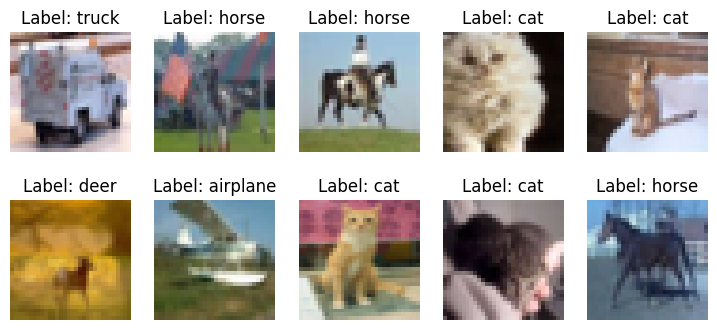

In [5]:
sample_images,sample_labels = [],[]
for d in data['train'].shuffle(100,seed=4321).take(10):
  sample_images.append(d['image'].numpy())
  sample_labels.append(d['label'].numpy())

label_map = dict(zip(
    list(range(10)),
    ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]))

f, axes = plt.subplots(2, 5, figsize=(9,4))
for i, (img, lbl) in enumerate(zip(sample_images, sample_labels)):
    r, c = i//5, i%5
    axes[r,c].imshow(img,cmap='gray')
    axes[r,c].axis('off')
    axes[r,c].set_title("Label: {}".format(label_map[lbl]))

# **Defining the model**

Let's define a CNN model. But wait, we are getting an error trying to run this model. This is because, one needs to be careful of the output sizes of the model's each layer. In this case, the model we created has led to an invalid height and width dimensions **causing an error**.

In [6]:
K.clear_session()

cnn = models.Sequential()
cnn.add(layers.Conv2D(filters=16, kernel_size=(3, 3), strides=(2,2),  activation='relu',padding='same', input_shape=(32, 32, 3)))
cnn.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2),padding='same'))
cnn.add(layers.Conv2D(32,(7,7),activation='relu')),
cnn.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2),padding='same'))
cnn.add(layers.Flatten()),
cnn.add(layers.Dense(64,activation='relu'))
cnn.add(layers.Dense(32,activation='relu'))
cnn.add(layers.Dense(10,activation='softmax'))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
cnn.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['acc'])

In [8]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 16, 16, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 8, 8, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 2, 2, 32)       │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 1, 1, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,090 (117.54 KB)

 Trainable params: 30,090 (117.54 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
import tensorflow as tf

def format_data(x, depth):
    """ Create a tuple where 1st element is a batch of images
    and the second is a batch of onehot encoded vectors"""
    return (tf.cast(x["image"], 'float32'), tf.one_hot(x["label"], depth=depth))

# Map the dataset using the function
tr_data = data["train"].map(lambda x: format_data(x, depth=10)).batch(32)

In [10]:
for d in tr_data.take(1):
    print(d)

(<tf.Tensor: shape=(32, 32, 32, 3), dtype=float32, numpy=
array([[[[143.,  96.,  70.],
         [141.,  96.,  72.],
         [135.,  93.,  72.],
         ...,
         [ 96.,  37.,  19.],
         [105.,  42.,  18.],
         [104.,  38.,  20.]],

        [[128.,  98.,  92.],
         [146., 118., 112.],
         [170., 145., 138.],
         ...,
         [108.,  45.,  26.],
         [112.,  44.,  24.],
         [112.,  41.,  22.]],

        [[ 93.,  69.,  75.],
         [118.,  96., 101.],
         [179., 160., 162.],
         ...,
         [128.,  68.,  47.],
         [125.,  61.,  42.],
         [122.,  59.,  39.]],

        ...,

        [[187., 150., 123.],
         [184., 148., 123.],
         [179., 142., 121.],
         ...,
         [198., 163., 132.],
         [201., 166., 135.],
         [207., 174., 143.]],

        [[187., 150., 117.],
         [181., 143., 115.],
         [175., 136., 113.],
         ...,
         [201., 164., 132.],
         [205., 168., 135.],
         

In [11]:
# Section 4.2
# Fit the data
history = cnn.fit(tr_data,epochs=25)

Epoch 1/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - acc: 0.2694 - loss: 2.4047
Epoch 2/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - acc: 0.4549 - loss: 1.5211
Epoch 3/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - acc: 0.4995 - loss: 1.3973
Epoch 4/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - acc: 0.5255 - loss: 1.3313
Epoch 5/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - acc: 0.5443 - loss: 1.2812
Epoch 6/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - acc: 0.5595 - loss: 1.2400
Epoch 7/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - acc: 0.5709 - loss: 1.2096
Epoch 8/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - acc: 0.5872 - loss: 1.1765
Epoch 9/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - acc: 0.5936 - loss: 1.1549
Epoch 10/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - acc: 0.6070 - loss: 1.1299
Epoch 11/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - acc: 0.6103 - loss: 1.1132
Epoch 12/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - acc: 0.6156 - l